# Implement a KNN model to classify the animals in to categorie

In [2]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [3]:
data = pd.read_csv("Zoo.csv")
data

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [6]:
data_new = data.drop('animal name',axis=1)

In [7]:
X = data_new.drop('type',axis = 1)
X

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [10]:
Y = data_new['type']
Y

0      1
1      1
2      4
3      1
4      1
      ..
96     1
97     6
98     1
99     7
100    2
Name: type, Length: 101, dtype: int64

In [11]:
num_folds = 10
kfold = KFold(n_splits=10)

In [22]:
model = KNeighborsClassifier(n_neighbors=15)
results = cross_val_score(model,X,Y, cv=kfold)

In [23]:
results.mean()

0.78

# Grid Search for Algorithm Tuning for best K

In [15]:
from sklearn.model_selection import GridSearchCV

In [17]:
n_neighbors = np.array(range(1,30))
param_grid = dict(n_neighbors=n_neighbors)

In [18]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(X,Y)

C:\Users\Shubh191\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])})

In [19]:
print(grid.best_score_)
print(grid.best_params_)

0.97
{'n_neighbors': 1}


# Visualizing the CV results

C:\Users\Shubh191\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\Shubh191\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\Shubh191\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\Shubh191\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\Shubh191\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\S

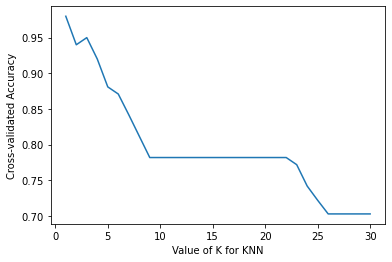

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline
k_range = range(1,31)
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, Y, cv = 10)
    k_scores.append(scores.mean())
    
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-validated Accuracy')
plt.show()

# Split train test data into 70/30

In [26]:
from sklearn.model_selection import train_test_split
X = data_new.drop('type',axis = 1)
Y = data_new['type']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size =0.3, random_state=1,stratify=Y)

In [27]:
X_train

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
37,0,1,1,0,1,0,1,0,1,1,0,0,2,1,0,0
81,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
56,0,1,1,0,0,0,0,0,1,1,0,0,2,1,0,1
60,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,0
72,0,0,0,0,0,0,1,0,0,1,1,0,8,1,0,0
26,0,0,1,0,0,1,1,1,1,1,1,0,4,0,0,0
75,1,0,0,1,0,1,1,1,1,1,0,1,2,1,0,1


In [28]:
X_test

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
19,0,0,0,1,0,1,1,1,1,1,0,1,0,1,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
89,0,0,1,0,0,1,0,1,1,1,0,0,4,0,0,0
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
43,0,1,1,0,1,0,0,0,1,1,0,0,2,1,0,0
93,1,0,0,1,1,0,0,1,1,1,0,0,2,1,0,0
85,0,0,1,0,0,1,1,0,0,0,0,0,5,0,0,0
76,0,0,0,0,0,1,1,1,1,0,1,0,0,1,0,0
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1
18,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,1


In [29]:
Y_train.head()

37    2
81    7
98    1
56    2
60    4
Name: type, dtype: int64

In [30]:
Y_test.head()

19    1
1     1
89    5
2     4
43    2
Name: type, dtype: int64

In [31]:
num_folds = 10
kfold = KFold(n_splits=10)

In [32]:
model = KNeighborsClassifier(n_neighbors=1)
model.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=1)

In [34]:
#predicting on test data
pred = model.predict(X_test)
pd.Series(pred).value_counts()

1    13
2     6
4     5
7     3
6     2
5     1
3     1
dtype: int64

In [35]:
pd.crosstab(Y_test,pred)

col_0,1,2,3,4,5,6,7
type,,,,,,,
1,13,0,0,0,0,0,0
2,0,6,0,0,0,0,0
3,0,0,1,1,0,0,0
4,0,0,0,4,0,0,0
5,0,0,0,0,1,0,0
6,0,0,0,0,0,2,0
7,0,0,0,0,0,0,3


In [36]:
# Accuracy 
np.mean(pred==Y_test)

0.967741935483871

In [37]:
model.score(X_train,Y_train)

1.0